In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

from cdlib import algorithms
from cdlib import viz

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
df = pd.read_csv("country_relationships.csv")

print(df.shape)
df.head()

(109, 2)


,Country1,Country2
0,Germany,Russia
1,Germany,Italy
2,Germany,United States
3,Austria,Germany
4,United Kingdom,France


In [3]:
# Make sure relationships are treated as undirected
df_sorted = pd.DataFrame(
    sorted([sorted([row["Country1"], row["Country2"]]) for _, row in df.iterrows()]),
    columns=["Country1", "Country2"]
)

# Remove duplicates
df_clean = df_sorted.drop_duplicates()

print("Original shape:", df.shape)
print("After removing duplicates:", df_clean.shape)

Original shape: (109, 2)
After removing duplicates: (53, 2)


In [4]:
# Create a network (graph) object from the cleaned relationships
G = nx.from_pandas_edgelist(df_clean, source="Country1", target="Country2")

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 21
Number of edges: 53


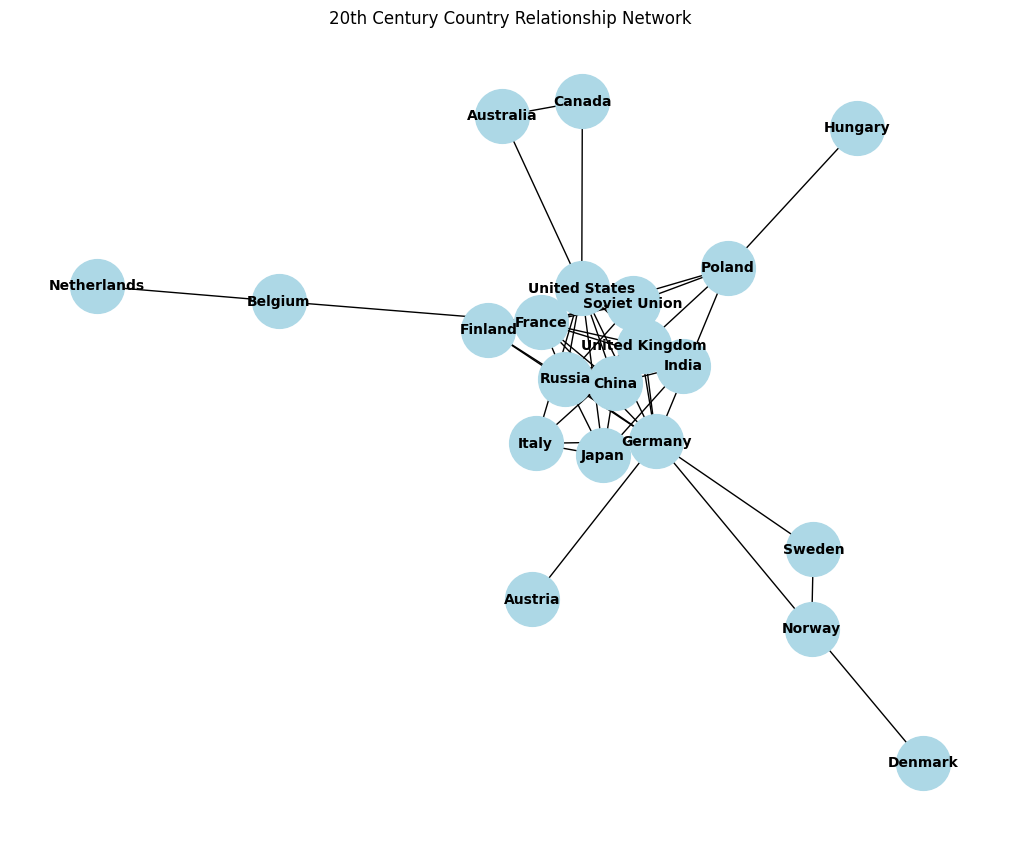

In [5]:
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1500,
    node_color="lightblue",
    font_size=10,
    font_weight="bold"
)

plt.title("20th Century Country Relationship Network")
plt.show()

In [7]:
# Create interactive network (Pyvis) and save as HTML
net = Network(height="700px", width="100%", bgcolor="white", font_color="black", directed=False)

net.from_nx(G)

# Use write_html instead of show() to avoid the template error
net.write_html("20th_century_interactive_network.html", open_browser=False)

print("Saved: 20th_century_interactive_network.html")

Saved: 20th_century_interactive_network.html


In [9]:
# Apply Leiden community detection
from cdlib import algorithms

communities = algorithms.leiden(G)

print("Number of communities found:", len(communities.communities))

communities.communities

Number of communities found: 4


[['China',
  'India',
  'Japan',
  'Russia',
  'Soviet Union',
  'United Kingdom',
  'Finland'],
 ['Austria', 'Germany', 'Denmark', 'Norway', 'Sweden'],
 ['Belgium', 'France', 'Netherlands', 'Poland', 'Hungary'],
 ['Australia', 'Canada', 'United States', 'Italy']]

In [10]:
# Create a color map for communities
community_colors = {}
colors = ["red", "blue", "green", "orange", "purple", "cyan"]

for i, community in enumerate(communities.communities):
    for node in community:
        community_colors[node] = colors[i]

# Create interactive network with community colors
net_comm = Network(height="700px", width="100%", bgcolor="white", font_color="black", directed=False)

for node in G.nodes():
    net_comm.add_node(node, label=node, color=community_colors[node])

for edge in G.edges():
    net_comm.add_edge(edge[0], edge[1])

net_comm.write_html("20th_century_community_network.html", open_browser=False)

print("Saved: 20th_century_community_network.html")

Saved: 20th_century_community_network.html


### Community Detection Interpretation

The Leiden algorithm detected **4 communities** within the 20th-century country relationship network.

The clusters broadly reflect historical alliances and regional groupings:

- One community groups **China, India, Japan, Russia, the Soviet Union, the United Kingdom, and Finland**. This reflects strong geopolitical interactions in Eurasia and Cold War dynamics.
- Another cluster contains **Austria, Germany, Denmark, Norway, and Sweden**, representing Central and Northern Europe.
- A third cluster includes **Belgium, France, Netherlands, Poland, and Hungary**, showing Western and Central European relationships.
- The final community groups **Australia, Canada, the United States, and Italy**, which aligns with Western Allied powers during major 20th-century conflicts.

Overall, the partition largely makes historical sense, as the algorithm grouped countries based on interaction frequency within key events. The results suggest strong regional connectivity and alliance-based clustering during major conflicts such as World War I, World War II, and the Cold War.

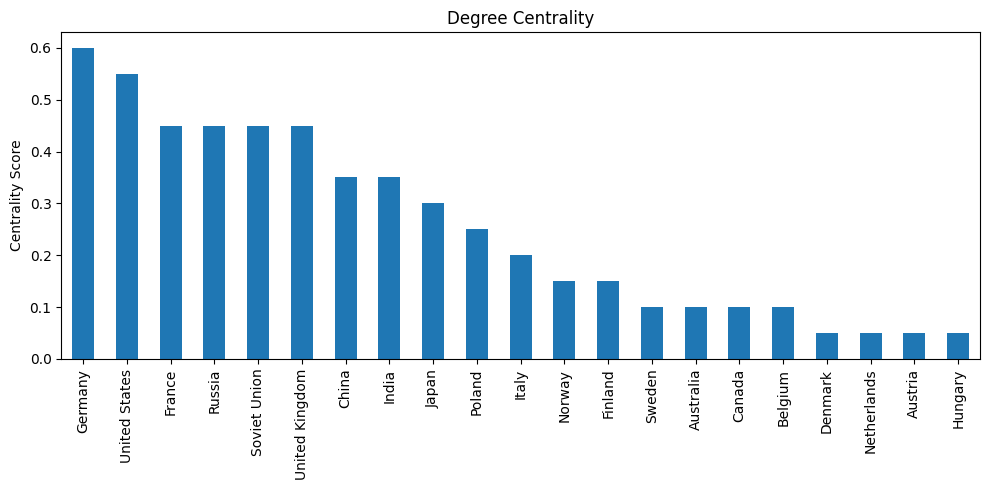

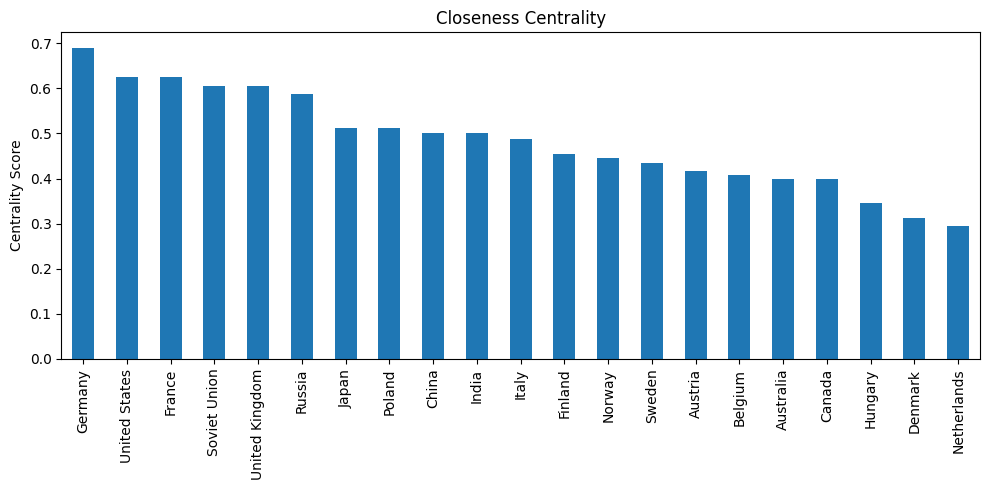

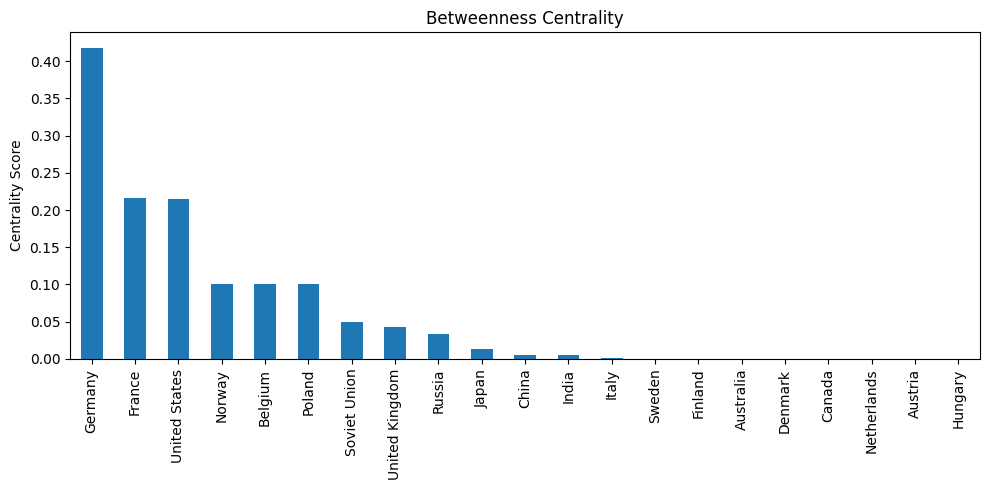

(Germany           0.60
 United States     0.55
 France            0.45
 Russia            0.45
 Soviet Union      0.45
 United Kingdom    0.45
 China             0.35
 India             0.35
 Japan             0.30
 Poland            0.25
 dtype: float64,
 Germany           0.689655
 United States     0.625000
 France            0.625000
 Soviet Union      0.606061
 United Kingdom    0.606061
 Russia            0.588235
 Japan             0.512821
 Poland            0.512821
 China             0.500000
 India             0.500000
 dtype: float64,
 Germany           0.417807
 France            0.215789
 United States     0.215175
 Norway            0.100000
 Belgium           0.100000
 Poland            0.100000
 Soviet Union      0.049123
 United Kingdom    0.043421
 Russia            0.034035
 Japan             0.013596
 dtype: float64)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

def plot_centrality(centrality_dict, title):
    series = pd.Series(centrality_dict).sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    series.plot(kind="bar")
    plt.title(title)
    plt.ylabel("Centrality Score")
    plt.tight_layout()
    plt.show()
    return series

degree_series = plot_centrality(degree_centrality, "Degree Centrality")
closeness_series = plot_centrality(closeness_centrality, "Closeness Centrality")
betweenness_series = plot_centrality(betweenness_centrality, "Betweenness Centrality")

degree_series.head(10), closeness_series.head(10), betweenness_series.head(10)

### Centrality Analysis Interpretation

The centrality measures highlight the most structurally important countries in the 20th-century relationship network.

**Degree Centrality:**  
Germany has the highest degree centrality, indicating it has the largest number of direct connections to other countries. This reflects Germany’s central role in major 20th-century events, particularly World War I and World War II. The United States, France, Russia, the Soviet Union, and the United Kingdom also show high values, reflecting their frequent involvement in global conflicts and alliances.

**Closeness Centrality:**  
Germany again ranks highest, suggesting it is well positioned within the network and can reach other countries through relatively short paths. The United States and France also score highly, indicating strong overall connectivity within the global system of relationships.

**Betweenness Centrality:**  
Germany shows the highest betweenness centrality by a large margin. This suggests Germany acts as a structural bridge between different country clusters, meaning many shortest paths between countries pass through it. France and the United States also display notable betweenness, indicating intermediary roles in global interactions.

Overall, the centrality results align with historical expectations. Major global powers and countries deeply involved in 20th-century conflicts occupy the most influential structural positions within the network.